In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# For reproducibility
np.random.seed(1000)

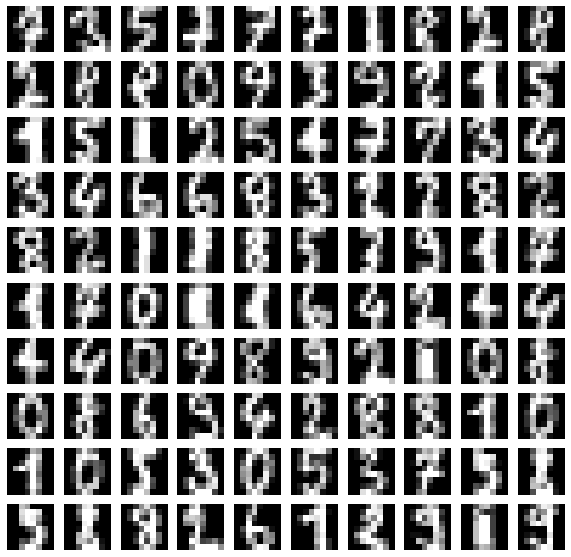

In [30]:
# Load MNIST digits
digits = load_digits()

# Show some random digits
selection = np.random.randint(0, 1797, size=100)

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

samples = [digits.data[x].reshape((8, 8)) for x in selection]

for i in range(10):
    for j in range(10):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(samples[(i * 8) + j], cmap='gray')

plt.show()

In [31]:
# Perform a PCA on the digits dataset
n_comp = 36
pca = PCA(n_components=n_comp, whiten=True)
X_pca = pca.fit_transform(digits.data / 255)

print('Explained variance ratio')
print(pca.explained_variance_ratio_)

Explained variance ratio
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.0048954  0.00428887
 0.00373606 0.00353272 0.00336679 0.00328028 0.0030832  0.00293774]


Explained variance ratio
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575614 0.00515157 0.0048954  0.00428888
 0.00373606 0.00353262 0.00336681 0.00328017 0.00308307 0.00293778]


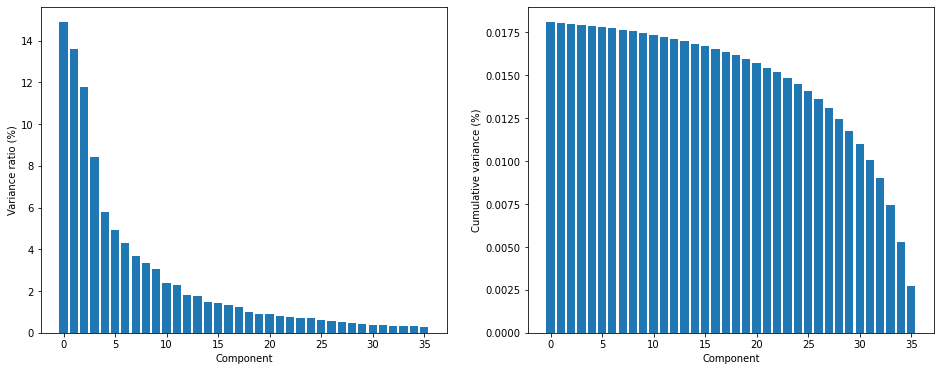

In [36]:
# Perform a PCA on the digits dataset

pca = PCA(n_components=n_comp, whiten=True)
X_pca = pca.fit_transform(digits.data / 255)

print('Explained variance ratio')
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].set_xlabel('Component')
ax[0].set_ylabel('Variance ratio (%)')
ax[0].bar(np.arange(n_comp), pca.explained_variance_ratio_ * 100.0)

ax[1].set_xlabel('Component')
ax[1].set_ylabel('Cumulative variance (%)')
ax[1].bar(np.arange(n_comp), np.cumsum(pca.explained_variance_)[::-1])

plt.show()


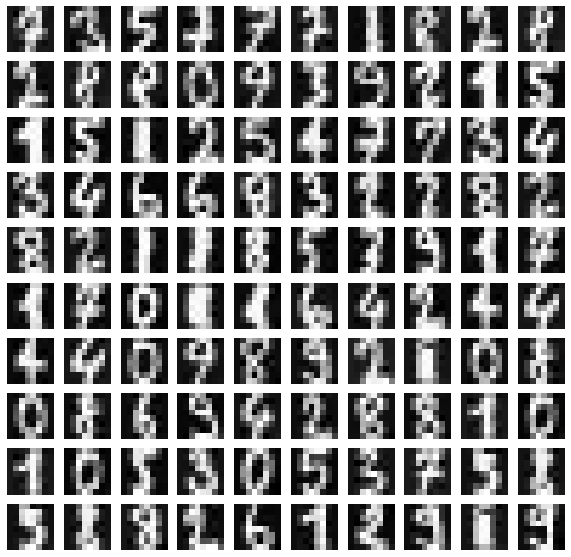

In [39]:
# Rebuild from PCA and show the result
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

samples = [pca.inverse_transform(X_pca[x]).reshape((8, 8)) for x in selection]

for i in range(10):
    for j in range(10):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(samples[(i * 8) + j], cmap='gray')

plt.show()


Non-negative matrix factorization (NNMF) is used instead of standard PCA with SVD.

In [40]:
from sklearn.datasets import load_iris
from sklearn.decomposition import NMF

In [41]:
# Load iris dataset
iris = load_iris()
print('Irid dataset shape')
print(iris.data.shape)

Irid dataset shape
(150, 4)


In [42]:
# Perform a non-negative matrix factorization
nmf = NMF(n_components=3, init='random', l1_ratio=0.1)
Xt = nmf.fit_transform(iris.data)

print('Reconstruction error')
print(nmf.reconstruction_err_)

print('Original Iris sample')
print(iris.data[0])

print('Compressed Iris sample (via Non-Negative Matrix Factorization)')
print(Xt[0])

print('Rebuilt sample')
print(nmf.inverse_transform(Xt[0]))

Reconstruction error
1.895312121105957
Original Iris sample
[5.1 3.5 1.4 0.2]
Compressed Iris sample (via Non-Negative Matrix Factorization)
[0.28723529 0.19209136 1.33795793]
Rebuilt sample
[5.09988636 3.50061942 1.3990681  0.1983601 ]


/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Kernel PCA

In [43]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import KernelPCA

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


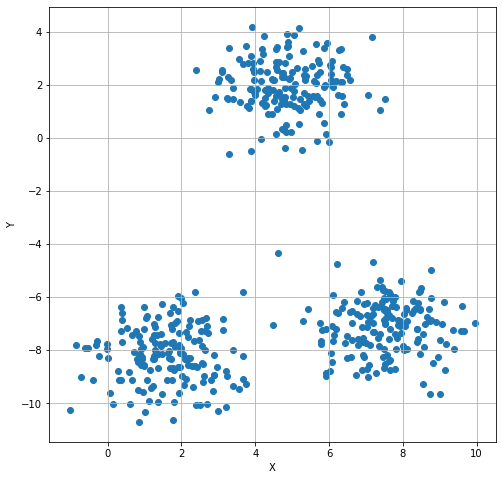

In [53]:
# Create a dummy dataset
Xb, Yb = make_blobs(n_samples=500, centers=3, n_features=3)

# Show the dataset
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(Xb[:, 0], Xb[:, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

plt.show()

In [54]:
# Perform a kernel PCA (with radial basis function)
kpca = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True)
X_kpca = kpca.fit_transform(Xb)

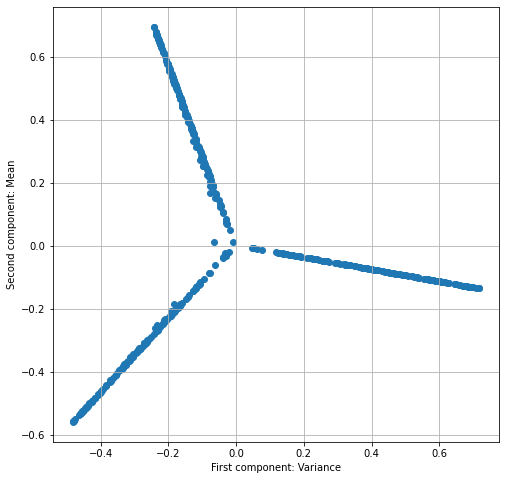

In [55]:
# Plot the dataset after PCA
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(kpca.X_transformed_fit_[:, 0], kpca.X_transformed_fit_[:, 1])
ax.set_xlabel('First component: Variance')
ax.set_ylabel('Second component: Mean')
ax.grid()

plt.show()


Atom extraction and dictionary learning

In [56]:
from sklearn.decomposition import DictionaryLearning

In [57]:
# Load MNIST digits
digits = load_digits()


In [ ]:
# Perform a dictionary learning (and atom extraction) from the MNIST dataset
dl = DictionaryLearning(n_components=36, fit_algorithm='lars', transform_algorithm='lasso_lars')
X_dict = dl.fit_transform(digits.data)


In [ ]:
# Show the atoms that have been extracted
fig, ax = plt.subplots(6, 6, figsize=(8, 8))

samples = [dl.components_[x].reshape((8, 8)) for x in range(34)]

for i in range(6):
    for j in range(6):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(samples[(i * 5) + j], cmap='gray')

plt.show()
